<a href="https://colab.research.google.com/github/bushio/keras_tutorial/blob/main/notebook/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [CIFAR100](https://www.cs.toronto.edu/~kriz/cifar.html)
- Kerasの[CIFAR100](https://keras.io/ja/datasets/)について




In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, InputLayer,Flatten
from tensorflow.keras.optimizers import SGD
import numpy as np

#入力パラメータの設定

In [3]:
input_heihgt = 32
input_width = 32
input_channel = 3

#データの準備

In [4]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
x_train  = X_train.astype('float32')
x_test   = X_test.astype('float32')
x_train /= 255
x_test  /= 255
y_train  = tf.keras.utils.to_categorical(y_train, 100)
y_test   = tf.keras.utils.to_categorical(y_test, 100)

169017344/169001437 [==============================] - 4s 0us/step


#モデルの定義

In [5]:
def mnist_cnn(input_shape=(28,28,1)):
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(100, activation='softmax'))
  return model 

model = mnist_cnn((input_heihgt,input_width,input_channel))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                        

#学習パラメータの設定
- epochs: エポック数（学習データを入力する回数)
- batch_size: バッチサイズ
- loss: [誤差関数](https://keras.io/ja/losses/)
- optimizer: [最適化アルゴリズム](https://keras.io/ja/optimizers/)　
- metrics: [評価関数](https://keras.io/ja/metrics/)

In [6]:
epochs = 100
batch_size = 128
loss = 'categorical_crossentropy'
optimizer = 'rmsprop'
metrics = 'accuracy'

#コールバック
- [コールバック関数](https://keras.io/ja/callbacks/)

In [7]:
eary_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=0, mode='auto')
callbacks=[eary_stopping]

#学習の実行




In [8]:
model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test),callbacks=callbacks)

Epoch 1/100
391/391 [==============================] - 17s 13ms/step - loss: 4.2293 - accuracy: 0.0616 - val_loss: 3.7491 - val_accuracy: 0.1508
Epoch 2/100
391/391 [==============================] - 5s 12ms/step - loss: 3.7161 - accuracy: 0.1382 - val_loss: 3.3215 - val_accuracy: 0.2302
Epoch 3/100
391/391 [==============================] - 5s 12ms/step - loss: 3.4297 - accuracy: 0.1822 - val_loss: 3.0597 - val_accuracy: 0.2783
Epoch 4/100
391/391 [==============================] - 5s 12ms/step - loss: 3.2494 - accuracy: 0.2164 - val_loss: 2.9497 - val_accuracy: 0.2943
Epoch 5/100
391/391 [==============================] - 5s 12ms/step - loss: 3.1019 - accuracy: 0.2389 - val_loss: 2.8978 - val_accuracy: 0.2922
Epoch 6/100
391/391 [==============================] - 5s 12ms/step - loss: 2.9752 - accuracy: 0.2613 - val_loss: 2.7788 - val_accuracy: 0.3137
Epoch 7/100
391/391 [==============================] - 5s 12ms/step - loss: 2.8884 - accuracy: 0.2773 - val_loss: 2.6770 - val_accuracy

# 学習結果の検証

In [9]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 2.8244 - accuracy: 0.3304
Test loss: 2.824432611465454
Test accuracy: 0.3303999900817871


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
CIFAR100_LABELS_LIST = [
                        'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
                        'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
                        'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
                        'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
                        'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
                        'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
                        'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
                        'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
                        'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
                        'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
                        'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
                        'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
                        'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
                        'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
                        'worm'
                        ]

(1, 32, 32, 3)
pine_tree
predicted label: caterpillar


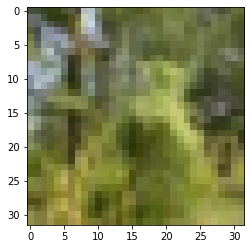

In [20]:
ind=np.random.randint(0,10000)
test_img = X_test[ind]
predict_img = x_test[ind].reshape(1,32,32,3)
label=np.argmax(y_test[ind])
plt.imshow(test_img)
predictions = model.predict(predict_img)
predicted_label=np.argmax(predictions)
print("predicted label: {}".format(CIFAR100_LABELS_LIST[predicted_label]))

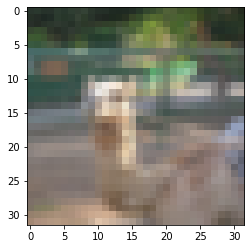

true label: camel
predicted label: lobster


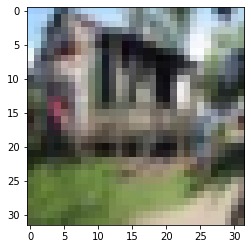

true label: house
predicted label: bus


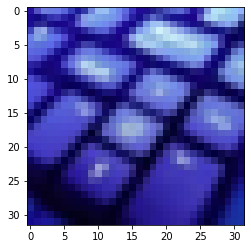

true label: keyboard
predicted label: worm


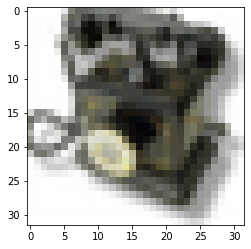

true label: telephone
predicted label: turtle


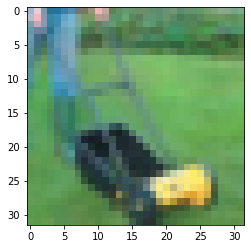

true label: lawn_mower
predicted label: lawn_mower


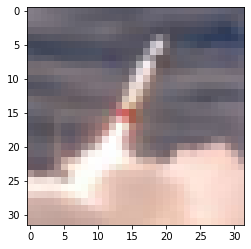

true label: rocket
predicted label: rocket


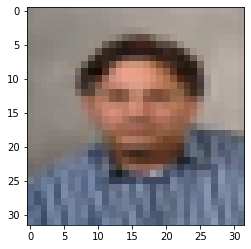

true label: man
predicted label: girl


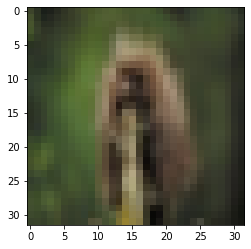

true label: porcupine
predicted label: kangaroo


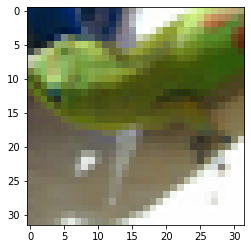

true label: lizard
predicted label: bee


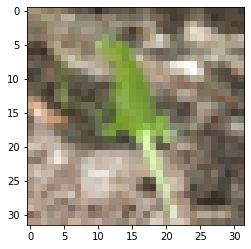

true label: lizard
predicted label: lizard


In [23]:
test_image = 10
for i in range(test_image):
  ind=np.random.randint(0,10000)
  test_img = X_test[ind]
  predict_img = x_test[ind].reshape(1,32,32,3)
  label=np.argmax(y_test[ind])
  plt.imshow(test_img)
  plt.show()
  predictions = model.predict(predict_img)
  predicted_label=np.argmax(predictions)
  print("true label: {}".format(CIFAR100_LABELS_LIST[label]))
  print("predicted label: {}".format(CIFAR100_LABELS_LIST[predicted_label]))
